In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
len(y_train)

60000

In [7]:
X_train[0].shape

(28, 28)

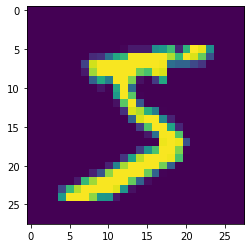

In [8]:
plt.imshow(X_train[0])

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [18]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
     keras.layers.Dense(100, activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4202 - accuracy: 0.8738
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2233 - accuracy: 0.9350
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1884 - accuracy: 0.9449
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1697 - accuracy: 0.9499
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1554 - accuracy: 0.9522


In [24]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1645 - accuracy: 0.9521


[0.1644587367773056, 0.9520999789237976]

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([2.1412602e-01, 4.2260310e-04, 7.0180833e-01, 2.9987743e-01,
       4.2627258e-03, 8.1791822e-03, 1.8594719e-05, 9.9910367e-01,
       2.1095371e-02, 3.7201500e-01], dtype=float32)

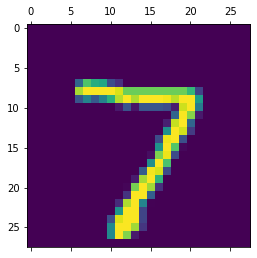

In [29]:
plt.matshow(X_test[0])

In [30]:
np.argmax(y_predicted[0])

7

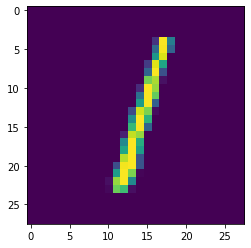

In [31]:
plt.imshow(X_test[2])

In [32]:
np.argmax(y_predicted[2])

1

In [34]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

InvalidArgumentError: ignored

In [37]:
y_predicted_labels =[np.argmax(i) for i in y_predicted]


In [36]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

InvalidArgumentError: ignored

In [38]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [40]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    2,    0,    1,    1,    1,    1,    3],
       [   0, 1118,    4,    3,    0,    2,    3,    2,    3,    0],
       [  10,    1,  983,   10,    3,    2,    7,    9,    7,    0],
       [   3,    0,   14,  961,    0,   15,    0,   10,    6,    1],
       [   6,    3,    5,    1,  927,    0,   14,    5,    1,   20],
       [  16,    2,    3,   23,    2,  820,    8,    4,    8,    6],
       [  16,    3,    4,    3,    5,    8,  918,    0,    1,    0],
       [   4,    3,   14,    4,    0,    1,    0,  996,    1,    5],
       [   9,    4,    7,   24,    7,   12,    6,   13,  890,    2],
       [   7,    5,    1,   12,   17,   11,    0,   15,    3,  938]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

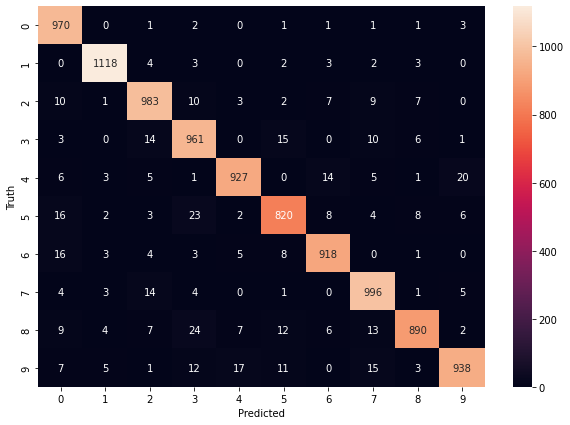

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2745 - accuracy: 0.9221
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1251 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0674 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0434 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0301 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020